## Configurações iniciais

In [159]:
#!wget https://media.githubusercontent.com/media/juliacfaria/arquivosTPDados/main/DadosLimpos/dadosLimpos2019.csv

In [160]:
#!wget https://media.githubusercontent.com/media/juliacfaria/arquivosTPDados/main/DadosLimpos/dadosLimpos2020.csv

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [162]:
fies2019 = pd.read_csv('./dadosLimpos2019.csv', encoding="UTF-8")

fies2020 = pd.read_csv('./dadosLimpos2020.csv', encoding="UTF-8")

## Fies 2019

Primeiro serão realizadas análises para o dataframe do Fies 2019. Em seguida, o mesmo será feito para o Fies 2020

### Discretizar atributos numéricos

Conforme aprendido em sala de aula, esta técnica de aprendizagem necessita que os atributos numéricos utilizados sejam organizados em categorias, de modo que tal conversão se faz necessária.

Primeiro, então, analisaremos as colunas prentes no dataset após sua limpeza

In [163]:
fies2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232432 entries, 0 to 232431
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID do estudante                 232432 non-null  int64  
 1   Sexo                            232432 non-null  object 
 2   Data de Nascimento              232432 non-null  object 
 3   UF de residência                232432 non-null  object 
 4   Etnia/Cor                       232432 non-null  object 
 5   Pessoa com deficiência?         232432 non-null  object 
 6   Ano conclusão ensino médio      232432 non-null  int64  
 7   Concluiu curso superior?        232432 non-null  object 
 8   Nº de membros Grupo Familiar    232432 non-null  int64  
 9   Renda familiar mensal bruta     232432 non-null  float64
 10  Renda mensal bruta per capita   232432 non-null  float64
 11  UF                              232432 non-null  object 
 12  Área do conhecim

### Visando analisar regras de associação para a Situação de Inscrição no FIES

Como o campo "Situação Inscrição Fies" será avaliado nas conjunto de regras de associação, definiu-se as colunas de interesse como aquelas que pensamos que poderiam influir e/ou estar relacionadas com este campo, sendo elas:

"Nº de membros Grupo Familiar", "Renda familiar mensal bruta", "Renda mensal bruta per capita", "Opções de cursos da inscrição",
"Sexo", "UF de residência", "Etnia/Cor", "Pessoa com deficiência?", "Concluiu curso superior?", "Situação Inscrição Fies"


Desta forma, dentre estes campos, os que forem numéricos serão convertidos em categorias

#### Convertendo Nº de membros Grupo Familiar

Os intervalores correspondentes a cada categoria foi definido com base nas estatísticas

In [164]:
fies2019['Nº de membros Grupo Familiar'].describe()

count    232432.000000
mean          2.220219
std           1.172808
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          25.000000
Name: Nº de membros Grupo Familiar, dtype: float64

In [165]:
bins = [0, 1, 3, np.inf]
names = ['MEMBROSFAMILIA<Q1','MEMBROSFAMILIA<Q2_Q3>','MEMBROSFAMILIA>Q3']
fies2019['cat_membros_familia'] = pd.cut(fies2019['Nº de membros Grupo Familiar'], bins, labels=names)
fies2019[['Nº de membros Grupo Familiar','cat_membros_familia']]

,Nº de membros Grupo Familiar,cat_membros_familia
0,2,MEMBROSFAMILIA<Q2_Q3>
1,3,MEMBROSFAMILIA<Q2_Q3>
2,2,MEMBROSFAMILIA<Q2_Q3>
3,1,MEMBROSFAMILIA<Q1
4,3,MEMBROSFAMILIA<Q2_Q3>
...,...,...
232427,2,MEMBROSFAMILIA<Q2_Q3>
232428,2,MEMBROSFAMILIA<Q2_Q3>
232429,2,MEMBROSFAMILIA<Q2_Q3>
232430,3,MEMBROSFAMILIA<Q2_Q3>


Observe que agora um novo campo foi adicionado, o qual é uma categoria

In [166]:
fies2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232432 entries, 0 to 232431
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   ID do estudante                 232432 non-null  int64   
 1   Sexo                            232432 non-null  object  
 2   Data de Nascimento              232432 non-null  object  
 3   UF de residência                232432 non-null  object  
 4   Etnia/Cor                       232432 non-null  object  
 5   Pessoa com deficiência?         232432 non-null  object  
 6   Ano conclusão ensino médio      232432 non-null  int64   
 7   Concluiu curso superior?        232432 non-null  object  
 8   Nº de membros Grupo Familiar    232432 non-null  int64   
 9   Renda familiar mensal bruta     232432 non-null  float64 
 10  Renda mensal bruta per capita   232432 non-null  float64 
 11  UF                              232432 non-null  object  
 12  Ár

#### Convertendo Renda familiar mensal bruta

Os intervalores correspondentes a cada categoria foi definido com base nas estatísticas descritivas

In [167]:
fies2019['Renda familiar mensal bruta'].describe()

count    232432.000000
mean       2909.662826
std        2255.905552
min           0.000000
25%        1393.000000
50%        2200.000000
75%        3544.880000
max       36757.000000
Name: Renda familiar mensal bruta, dtype: float64

In [168]:
bins = [0, 1393, 3544.88, np.inf]
names = ['RENDABRUTA<Q1','RENDABRUTA<Q2_Q3>','RENDABRUTA>Q3']
fies2019['cat_renda_mensal_bruta'] = pd.cut(fies2019['Renda familiar mensal bruta'], bins, labels=names)
fies2019[['Renda familiar mensal bruta','cat_renda_mensal_bruta']]

,Renda familiar mensal bruta,cat_renda_mensal_bruta
0,6200.00,RENDABRUTA>Q3
1,2609.94,RENDABRUTA<Q2_Q3>
2,1600.00,RENDABRUTA<Q2_Q3>
3,2700.00,RENDABRUTA<Q2_Q3>
4,2000.00,RENDABRUTA<Q2_Q3>
...,...,...
232427,1000.00,RENDABRUTA<Q1
232428,2980.00,RENDABRUTA<Q2_Q3>
232429,2980.00,RENDABRUTA<Q2_Q3>
232430,2426.76,RENDABRUTA<Q2_Q3>


Observe que um novo campo foi criado, o qual é categórico


In [169]:
fies2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232432 entries, 0 to 232431
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   ID do estudante                 232432 non-null  int64   
 1   Sexo                            232432 non-null  object  
 2   Data de Nascimento              232432 non-null  object  
 3   UF de residência                232432 non-null  object  
 4   Etnia/Cor                       232432 non-null  object  
 5   Pessoa com deficiência?         232432 non-null  object  
 6   Ano conclusão ensino médio      232432 non-null  int64   
 7   Concluiu curso superior?        232432 non-null  object  
 8   Nº de membros Grupo Familiar    232432 non-null  int64   
 9   Renda familiar mensal bruta     232432 non-null  float64 
 10  Renda mensal bruta per capita   232432 non-null  float64 
 11  UF                              232432 non-null  object  
 12  Ár

#### Convertendo Renda mensal bruta per capita

Os intervalores correspondentes a cada categoria foi definido com base nas estatísticas descritivas

In [170]:
 
fies2019['Renda mensal bruta per capita'].describe()

count    232432.000000
mean        938.779092
std         623.362271
min           0.000000
25%         499.000000
50%         760.000000
75%        1200.000000
max        9831.360000
Name: Renda mensal bruta per capita, dtype: float64

In [171]:
bins = [0, 499, 1200, np.inf]
names = ['RENDAPERCAPITA<Q1','RENDAPERCAPITA<Q2_Q3>','RENDAPERCAPITA>Q3']
fies2019['cat_renda_per_capita'] = pd.cut(fies2019['Renda mensal bruta per capita'], bins, labels=names)
fies2019[['Renda mensal bruta per capita','cat_renda_per_capita']]

,Renda mensal bruta per capita,cat_renda_per_capita
0,2066.67,RENDAPERCAPITA>Q3
1,652.49,RENDAPERCAPITA<Q2_Q3>
2,533.33,RENDAPERCAPITA<Q2_Q3>
3,1350.00,RENDAPERCAPITA>Q3
4,500.00,RENDAPERCAPITA<Q2_Q3>
...,...,...
232427,333.33,RENDAPERCAPITA<Q1
232428,993.33,RENDAPERCAPITA<Q2_Q3>
232429,993.33,RENDAPERCAPITA<Q2_Q3>
232430,606.69,RENDAPERCAPITA<Q2_Q3>


Observe que um novo campo foi criado, o qual é categórico

In [172]:
fies2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232432 entries, 0 to 232431
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   ID do estudante                 232432 non-null  int64   
 1   Sexo                            232432 non-null  object  
 2   Data de Nascimento              232432 non-null  object  
 3   UF de residência                232432 non-null  object  
 4   Etnia/Cor                       232432 non-null  object  
 5   Pessoa com deficiência?         232432 non-null  object  
 6   Ano conclusão ensino médio      232432 non-null  int64   
 7   Concluiu curso superior?        232432 non-null  object  
 8   Nº de membros Grupo Familiar    232432 non-null  int64   
 9   Renda familiar mensal bruta     232432 non-null  float64 
 10  Renda mensal bruta per capita   232432 non-null  float64 
 11  UF                              232432 non-null  object  
 12  Ár

#### Convertendo Opções de cursos da inscrição

Os intervalores correspondentes a cada categoria foi definido com base nas estatísticas

In [173]:
fies2019['Opções de cursos da inscrição'].describe()

count    232432.000000
mean          1.669822
std           0.770074
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           3.000000
Name: Opções de cursos da inscrição, dtype: float64

In [174]:
bins = [0, 1, 2, np.inf]
names = ['OPCAOINSCRICAO<Q1','OPCAOINSCRICAO<Q2_Q3>','OPCAOINSCRICAO>Q3']
fies2019['cat_opcao_inscricao'] = pd.cut(fies2019['Opções de cursos da inscrição'], bins, labels=names)
fies2019[['Opções de cursos da inscrição','cat_opcao_inscricao']]

,Opções de cursos da inscrição,cat_opcao_inscricao
0,3,OPCAOINSCRICAO>Q3
1,2,OPCAOINSCRICAO<Q2_Q3>
2,1,OPCAOINSCRICAO<Q1
3,1,OPCAOINSCRICAO<Q1
4,1,OPCAOINSCRICAO<Q1
...,...,...
232427,2,OPCAOINSCRICAO<Q2_Q3>
232428,1,OPCAOINSCRICAO<Q1
232429,2,OPCAOINSCRICAO<Q2_Q3>
232430,1,OPCAOINSCRICAO<Q1


Observe que um novo campo foi criado, o qual é categórico

In [175]:
fies2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232432 entries, 0 to 232431
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   ID do estudante                 232432 non-null  int64   
 1   Sexo                            232432 non-null  object  
 2   Data de Nascimento              232432 non-null  object  
 3   UF de residência                232432 non-null  object  
 4   Etnia/Cor                       232432 non-null  object  
 5   Pessoa com deficiência?         232432 non-null  object  
 6   Ano conclusão ensino médio      232432 non-null  int64   
 7   Concluiu curso superior?        232432 non-null  object  
 8   Nº de membros Grupo Familiar    232432 non-null  int64   
 9   Renda familiar mensal bruta     232432 non-null  float64 
 10  Renda mensal bruta per capita   232432 non-null  float64 
 11  UF                              232432 non-null  object  
 12  Ár

### Selecionar atributos relevantes

Os atributos selecionados são aqueles que foram mencionados previamente, os quais foram definidos em razão da aparente relação com a situação da inscrição do FIES

In [176]:
df_rules = fies2019[["cat_membros_familia", "cat_renda_mensal_bruta", "cat_renda_per_capita", "cat_opcao_inscricao",
"Sexo", "UF de residência", "Etnia/Cor", "Pessoa com deficiência?", "Concluiu curso superior?", "Situação Inscrição Fies"]]
df_rules.head()

,cat_membros_familia,cat_renda_mensal_bruta,cat_renda_per_capita,cat_opcao_inscricao,Sexo,UF de residência,Etnia/Cor,Pessoa com deficiência?,Concluiu curso superior?,Situação Inscrição Fies
0,MEMBROSFAMILIA<Q2_Q3>,RENDABRUTA>Q3,RENDAPERCAPITA>Q3,OPCAOINSCRICAO>Q3,M,PR,PARDA,NÃO,NÃO,NÃO CONTRATADO
1,MEMBROSFAMILIA<Q2_Q3>,RENDABRUTA<Q2_Q3>,RENDAPERCAPITA<Q2_Q3>,OPCAOINSCRICAO<Q2_Q3>,M,PR,BRANCA,NÃO,NÃO,OPÇÃO NÃO CONTRATADA
2,MEMBROSFAMILIA<Q2_Q3>,RENDABRUTA<Q2_Q3>,RENDAPERCAPITA<Q2_Q3>,OPCAOINSCRICAO<Q1,M,PR,BRANCA,NÃO,NÃO,NÃO CONTRATADO
3,MEMBROSFAMILIA<Q1,RENDABRUTA<Q2_Q3>,RENDAPERCAPITA>Q3,OPCAOINSCRICAO<Q1,F,PR,BRANCA,NÃO,NÃO,NÃO CONTRATADO
4,MEMBROSFAMILIA<Q2_Q3>,RENDABRUTA<Q2_Q3>,RENDAPERCAPITA<Q2_Q3>,OPCAOINSCRICAO<Q1,F,RS,BRANCA,NÃO,NÃO,NÃO CONTRATADO


In [177]:
df_transactions = pd.get_dummies(df_rules)

In [178]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232432 entries, 0 to 232431
Data columns (total 58 columns):
 #   Column                                                         Non-Null Count   Dtype
---  ------                                                         --------------   -----
 0   cat_membros_familia_MEMBROSFAMILIA<Q1                          232432 non-null  uint8
 1   cat_membros_familia_MEMBROSFAMILIA<Q2_Q3>                      232432 non-null  uint8
 2   cat_membros_familia_MEMBROSFAMILIA>Q3                          232432 non-null  uint8
 3   cat_renda_mensal_bruta_RENDABRUTA<Q1                           232432 non-null  uint8
 4   cat_renda_mensal_bruta_RENDABRUTA<Q2_Q3>                       232432 non-null  uint8
 5   cat_renda_mensal_bruta_RENDABRUTA>Q3                           232432 non-null  uint8
 6   cat_renda_per_capita_RENDAPERCAPITA<Q1                         232432 non-null  uint8
 7   cat_renda_per_capita_RENDAPERCAPITA<Q2_Q3>                     23

### Extrair itemsets frequentes

Uma vez que os itemsets foram obtidos, faz-se necessária a verificação de qual destes são mais frequentes. Para tanto, utiliza-se o apriori, assim como visto em aula.

Observe que a equipe definiu que o suporte mínimo deve ser de 0.15, para evitar que associações com um suporte muito baixo sejam avaliadas

In [179]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [180]:
frequent_itemsets = apriori(df_transactions, min_support=0.1, use_colnames=True)
frequent_itemsets.head()

/home/juliacfaria/Desktop/ProjetoDados/ProjetoCienciaDeDados/ambiente-dados1/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.329395,(cat_membros_familia_MEMBROSFAMILIA<Q1)
1,0.542559,(cat_membros_familia_MEMBROSFAMILIA<Q2_Q3>)
2,0.128046,(cat_membros_familia_MEMBROSFAMILIA>Q3)
3,0.249738,(cat_renda_mensal_bruta_RENDABRUTA<Q1)
4,0.499991,(cat_renda_mensal_bruta_RENDABRUTA<Q2_Q3>)


### Extrair as regras de associação usando Apriori

In [181]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [182]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
rules.sort_values(by="confidence",ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2095,"(Concluiu curso superior?_NÃO, cat_renda_per_capita_RENDAPERCAPITA>Q3, cat_membros_familia_MEMBROSFAMILIA<Q2_Q3>)",(cat_renda_mensal_bruta_RENDABRUTA>Q3),0.116593,0.250000,0.116593,1.000000,4.000000,0.087445,inf
2082,"(Pessoa com deficiência?_NÃO, cat_renda_per_capita_RENDAPERCAPITA>Q3, cat_membros_familia_MEMBROSFAMILIA<Q2_Q3>)",(cat_renda_mensal_bruta_RENDABRUTA>Q3),0.127994,0.250000,0.127994,1.000000,4.000000,0.095996,inf
451,"(cat_renda_per_capita_RENDAPERCAPITA>Q3, cat_membros_familia_MEMBROSFAMILIA<Q2_Q3>)",(cat_renda_mensal_bruta_RENDABRUTA>Q3),0.129070,0.250000,0.129070,1.000000,4.000000,0.096803,inf
4665,"(Pessoa com deficiência?_NÃO, Concluiu curso superior?_NÃO, cat_renda_per_capita_RENDAPERCAPITA>Q3, cat_membros_familia_MEMBROSFAMILIA<Q2_Q3>)",(cat_renda_mensal_bruta_RENDABRUTA>Q3),0.115668,0.250000,0.115668,1.000000,4.000000,0.086751,inf
395,"(cat_renda_mensal_bruta_RENDABRUTA<Q1, cat_membros_familia_MEMBROSFAMILIA<Q2_Q3>)",(cat_renda_per_capita_RENDAPERCAPITA<Q1),0.116185,0.252018,0.116180,0.999963,3.967827,0.086900,2.019926e+04


Conforme é possível visualizar abaixo, o item gerado pelo algoritmo à priori é um frozenset. Para facilitar a manipulação de tal item, estes foram convertidos para string

In [183]:
type(rules['consequents'][0])

frozenset

Convertendo para strings...

In [184]:
rules["consequents"] = rules["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

### Avaliando regras inscrição ser aceita

Uma vez que as regras de associação já foram definidas, deve-se avaliar as regras que se relacionam às categorias importantes definidas previamente pela equipe, no caso, a inscrição aceita

#### Situação Inscrição Fies_CONTRATADA

Avaliando regras que possuem como consequente "Situação Inscrição Fies_CONTRATADA"

In [185]:
regrasContratada = rules[rules['consequents'] == 'Situação Inscrição Fies_CONTRATADA']

In [186]:
regrasContratada.sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3859,"(Pessoa com deficiência?_NÃO, Concluiu curso superior?_NÃO, cat_opcao_inscricao_OPCAOINSCRICAO<Q1)",Situação Inscrição Fies_CONTRATADA,0.478432,0.109512,0.101281,0.211694,1.933073,0.048887,1.129623
1324,"(Concluiu curso superior?_NÃO, cat_opcao_inscricao_OPCAOINSCRICAO<Q1)",Situação Inscrição Fies_CONTRATADA,0.482145,0.109512,0.101828,0.211197,1.928535,0.049027,1.128911
1308,"(Pessoa com deficiência?_NÃO, cat_opcao_inscricao_OPCAOINSCRICAO<Q1)",Situação Inscrição Fies_CONTRATADA,0.511969,0.109512,0.104758,0.204617,1.868449,0.048691,1.119572
163,(cat_opcao_inscricao_OPCAOINSCRICAO<Q1),Situação Inscrição Fies_CONTRATADA,0.516104,0.109512,0.105321,0.204070,1.863453,0.048802,1.118802


#### Situação Inscrição Fies_NÃO CONTRATADO

Avaliando regras que possuem como consequente "Situação Inscrição Fies_NÃO CONTRATADO"

In [187]:
regrasNaoContratado = rules[rules['consequents'] == 'Situação Inscrição Fies_NÃO CONTRATADO']

In [188]:
regrasNaoContratado.sort_values('support', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
232,(Pessoa com deficiência?_NÃO),Situação Inscrição Fies_NÃO CONTRATADO,0.992153,0.540756,0.536639,0.540883,1.000235,0.000126,1.000277
237,(Concluiu curso superior?_NÃO),Situação Inscrição Fies_NÃO CONTRATADO,0.935181,0.540756,0.510760,0.546162,1.009997,0.005055,1.011911
1556,"(Pessoa com deficiência?_NÃO, Concluiu curso superior?_NÃO)",Situação Inscrição Fies_NÃO CONTRATADO,0.928065,0.540756,0.506931,0.546224,1.010111,0.005074,1.012049
198,(Sexo_F),Situação Inscrição Fies_NÃO CONTRATADO,0.653929,0.540756,0.343279,0.524948,0.970767,-0.010337,0.966724
1447,"(Pessoa com deficiência?_NÃO, Sexo_F)",Situação Inscrição Fies_NÃO CONTRATADO,0.650250,0.540756,0.341433,0.525080,0.971010,-0.010194,0.966991
1458,"(Concluiu curso superior?_NÃO, Sexo_F)",Situação Inscrição Fies_NÃO CONTRATADO,0.610604,0.540756,0.323325,0.529516,0.979214,-0.006863,0.976109
4046,"(Pessoa com deficiência?_NÃO, Concluiu curso superior?_NÃO, Sexo_F)",Situação Inscrição Fies_NÃO CONTRATADO,0.607287,0.540756,0.321651,0.529652,0.979466,-0.006743,0.976392
135,(cat_renda_per_capita_RENDAPERCAPITA<Q2_Q3>),Situação Inscrição Fies_NÃO CONTRATADO,0.501592,0.540756,0.290382,0.578920,1.070576,0.019143,1.090634
89,(cat_renda_mensal_bruta_RENDABRUTA<Q2_Q3>),Situação Inscrição Fies_NÃO CONTRATADO,0.499991,0.540756,0.289969,0.579947,1.072475,0.019595,1.093301
1170,"(Pessoa com deficiência?_NÃO, cat_renda_per_capita_RENDAPERCAPITA<Q2_Q3>)",Situação Inscrição Fies_NÃO CONTRATADO,0.497802,0.540756,0.288256,0.579059,1.070832,0.019067,1.090993


### Calcula métricas

Para facilitar a obtenção de relação entre antecedentes e consequentes, utilizou-se uma função, a qual recebe estes valores como parâmetro e exibe métricas de acordo com estes

In [189]:
def calcula_metricas(att_antecedente, att_consequente):
  print("(",att_antecedente,") -> (",att_consequente,")")

  suporte = len(df_transactions[(df_transactions[att_antecedente] == 1) & (df_transactions[att_consequente] == 1) ])/ \
  len(df_transactions)
  print("Suporte: ",suporte)

  confianca = len(df_transactions[(df_transactions[att_antecedente] == 1) & (df_transactions[att_consequente] == 1) ])/ \
  len(df_transactions[df_transactions[att_antecedente] == 1])
  print("Confiança: ",confianca)

  lift = confianca / (len(df_transactions[df_transactions[att_consequente] == 1]) / len(df_transactions))

  print("Lift: ",lift)

  print("#########################")

display("Situação Inscrição Fies_CONTRATADA")
calcula_metricas("cat_opcao_inscricao_OPCAOINSCRICAO<Q1","Situação Inscrição Fies_CONTRATADA")
calcula_metricas("Pessoa com deficiência?_NÃO","Situação Inscrição Fies_CONTRATADA")
calcula_metricas("Concluiu curso superior?_NÃO","Situação Inscrição Fies_CONTRATADA")

display("Situação Inscrição Fies_NÃO CONTRATADO")
calcula_metricas("Pessoa com deficiência?_NÃO","Situação Inscrição Fies_NÃO CONTRATADO")
calcula_metricas("Concluiu curso superior?_NÃO","Situação Inscrição Fies_NÃO CONTRATADO")
calcula_metricas("cat_renda_per_capita_RENDAPERCAPITA<Q2_Q3>","Situação Inscrição Fies_NÃO CONTRATADO")
calcula_metricas("Sexo_F","Situação Inscrição Fies_NÃO CONTRATADO")


'Situação Inscrição Fies_CONTRATADA'

( cat_opcao_inscricao_OPCAOINSCRICAO<Q1 ) -> ( Situação Inscrição Fies_CONTRATADA )
Suporte:  0.1053211261788394
Confiança:  0.20406972382230595
Lift:  1.8634530544301962
#########################
( Pessoa com deficiência?_NÃO ) -> ( Situação Inscrição Fies_CONTRATADA )
Suporte:  0.10891357472292972
Confiança:  0.10977502948726844
Lift:  1.0024055022308784
#########################
( Concluiu curso superior?_NÃO ) -> ( Situação Inscrição Fies_CONTRATADA )
Suporte:  0.10576426653817031
Confiança:  0.11309496425383915
Lift:  1.0327213299068256
#########################


'Situação Inscrição Fies_NÃO CONTRATADO'

( Pessoa com deficiência?_NÃO ) -> ( Situação Inscrição Fies_NÃO CONTRATADO )
Suporte:  0.5366386728161354
Confiança:  0.5408832304169847
Lift:  1.0002352712829332
#########################
( Concluiu curso superior?_NÃO ) -> ( Situação Inscrição Fies_NÃO CONTRATADO )
Suporte:  0.510760136297928
Confiança:  0.546161773230404
Lift:  1.0099966844790655
#########################
( cat_renda_per_capita_RENDAPERCAPITA<Q2_Q3> ) -> ( Situação Inscrição Fies_NÃO CONTRATADO )
Suporte:  0.2903817030357266
Confiança:  0.5789202820235706
Lift:  1.0705757782407574
#########################
( Sexo_F ) -> ( Situação Inscrição Fies_NÃO CONTRATADO )
Suporte:  0.3432788944723618
Confiança:  0.5249483532244694
Lift:  0.9707674946627778
#########################


### Observando maior "confidence"

Neste momento, serão avaliadas as maiores confidences obtidas de acordo com o tipo de inscrição contratada e não contratado

In [190]:
regrasContratada[regrasContratada['confidence'] == regrasContratada.confidence.max()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3859,"(Pessoa com deficiência?_NÃO, Concluiu curso superior?_NÃO, cat_opcao_inscricao_OPCAOINSCRICAO<Q1)",Situação Inscrição Fies_CONTRATADA,0.478432,0.109512,0.101281,0.211694,1.933073,0.048887,1.129623


In [191]:
regrasNaoContratado[regrasNaoContratado['confidence'] == regrasNaoContratado.confidence.max()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4170,"(Pessoa com deficiência?_NÃO, Concluiu curso superior?_NÃO, cat_renda_mensal_bruta_RENDABRUTA<Q2_Q3>, cat_membros_familia_MEMBROSFAMILIA<Q1)",Situação Inscrição Fies_NÃO CONTRATADO,0.170915,0.540756,0.112601,0.658813,1.218318,0.020178,1.346018


### Plotando gráficos

Para observar de forma visual se existem possíveis relações entre os campos apontados pelas regras de associação e as categorias estudadas, gráficos serão plotados considerando tais campos.

In [192]:
import seaborn as sns

In [193]:
sns.set(rc={"figure.figsize":(5, 6.5)})

#### Situação Inscrição FIES x Pessoa com deficiência?

Observe que a escala logarítmica foi usada para poder visualizar melhor os dados. Como as pessoas com deficiência representam uma parcela pequena dos inscritos no FIES, as proporções avaliadas são bem diferentes

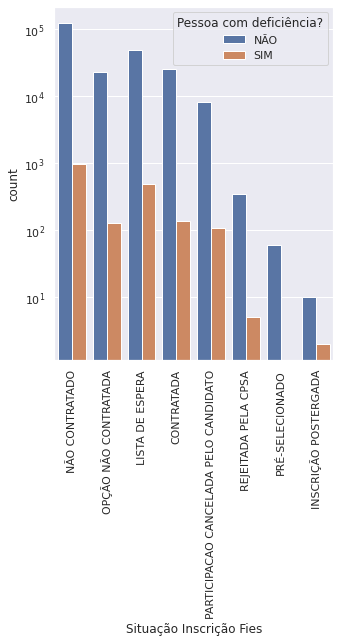

In [194]:
g = sns.countplot(x='Situação Inscrição Fies', hue = 'Pessoa com deficiência?', data=fies2019)
g.set_yscale("log")
g.tick_params(axis='x', rotation=90)

#### Situação Inscrição FIES x Sexo?

Observe que a escala logarítmica foi usada para poder visualizar melhor os dados. Conforme é possível observar, aparentemente neste ano, tem-se mais mulheres inscritas no FIES do que homens, o que também influencia nos dados

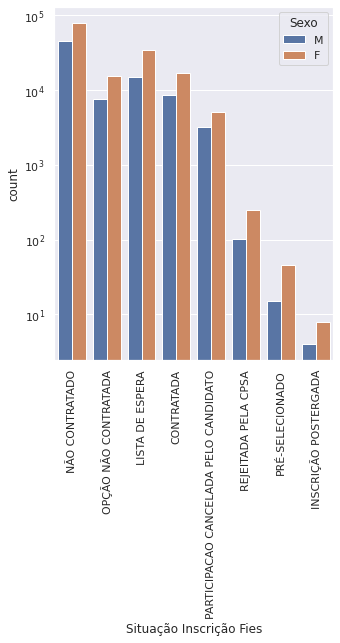

In [195]:
g = sns.countplot(x='Situação Inscrição Fies', hue = 'Sexo', data=fies2019)
g.set_yscale("log")
g.tick_params(axis='x', rotation=90)

#### Situação Inscrição Fies x Concluiu Curso Superior?

Observe que a escala logarítmica foi usada para poder visualizar melhor os dados. Assim como no caso das pessoas com deficiência, as pessoas que concluiram curso superior também representam uma parcela muito menor dos participantes do FIES

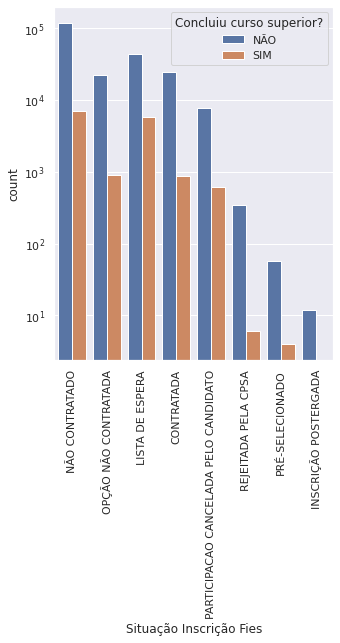

In [196]:
g = sns.countplot(x='Situação Inscrição Fies', hue = 'Concluiu curso superior?', data=fies2019)
g.set_yscale("log")
g.tick_params(axis='x', rotation=90)

#### Situação Inscrição Fies x Nº de membros família

Observe que a escala logarítmica foi usada para poder visualizar melhor os dados. Neste caso, o que apresenta ter uma relação maior é no caso de ser aceito e os membros da familia estarem no intervalo Q2_Q3.

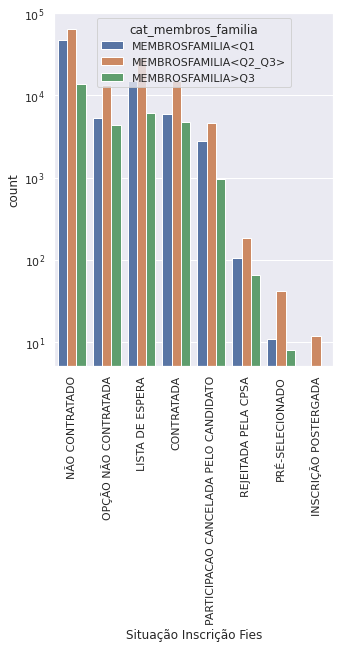

In [197]:
g = sns.countplot(x='Situação Inscrição Fies', hue = 'cat_membros_familia', data=fies2019)
g.set_yscale("log")
g.tick_params(axis='x', rotation=90)

#### Situação Inscrição Fies x Renda Per capita

Uma outra correlação clara é entre a renda per capita entre o Q2 e o Q3 e nao ser contratado

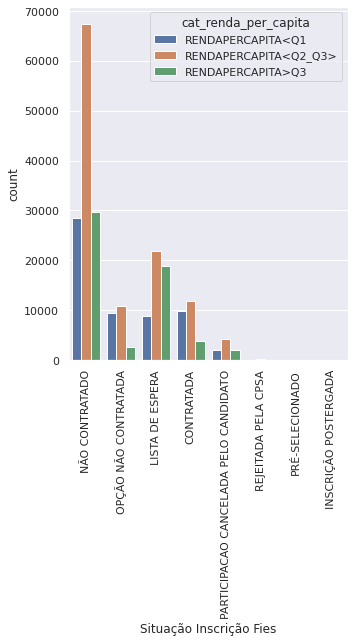

In [198]:

g = sns.countplot(x='Situação Inscrição Fies', hue = 'cat_renda_per_capita', data=fies2019)
g.tick_params(axis='x', rotation=90)

#### Situação Inscrição Fies x Opção de Inscrição

Observe que a escala logarítmica foi usada para poder visualizar melhor os dados. Por meio de tal gráfico pode-se observar, também que há mais pessoas se inscreveram para a primeira opção, o que já era esperado de acordo com as regras de negócio do FIES

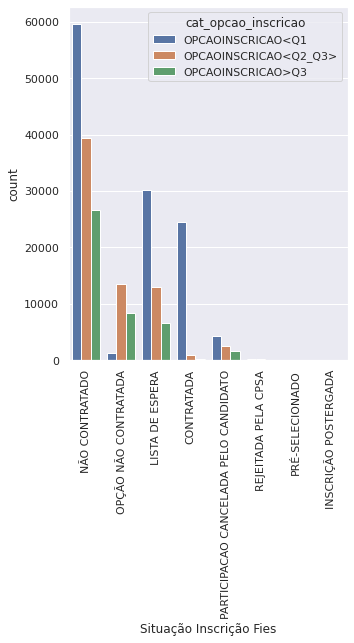

In [199]:
g = sns.countplot(x='Situação Inscrição Fies', hue = 'cat_opcao_inscricao', data=fies2019)
g.tick_params(axis='x', rotation=90)

#### Situação Inscrição Fies x Etnia/Cor

Observe que a escala logarítmica foi usada para poder visualizar melhor os dados. Por meio de tal gráfico pode-se observar, também que há mais pessoas pardas que não foram contratadas

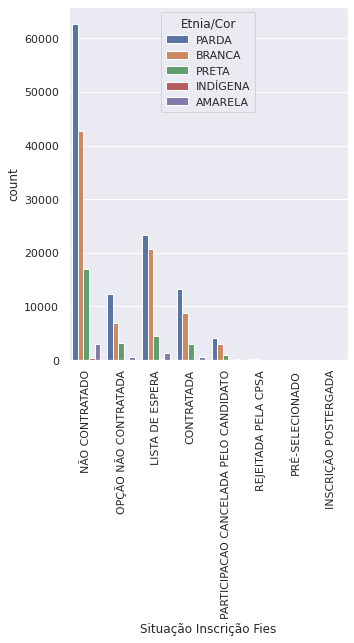

In [200]:
g = sns.countplot(x='Situação Inscrição Fies', hue = 'Etnia/Cor', data=fies2019)
g.tick_params(axis='x', rotation=90)

## Fies 2020

### Discretizar atributos numéricos

Conforme aprendido em sala de aula, esta técnica de aprendizagem necessita que os atributos numéricos utilizados sejam organizados em categorias, de modo que tal conversão se faz necessária.

Primeiro, então, analisaremos as colunas prentes no dataset após sua limpeza

In [201]:
fies2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182425 entries, 0 to 182424
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID do estudante                 182425 non-null  int64  
 1   Sexo                            182425 non-null  object 
 2   Data de Nascimento              182425 non-null  object 
 3   UF de residência                182425 non-null  object 
 4   Etnia/Cor                       182425 non-null  object 
 5   Pessoa com deficiência?         182425 non-null  object 
 6   Ano conclusão ensino médio      182425 non-null  int64  
 7   Concluiu curso superior?        182425 non-null  object 
 8   Nº de membros Grupo Familiar    182425 non-null  int64  
 9   Renda familiar mensal bruta     182425 non-null  float64
 10  Renda mensal bruta per capita   182425 non-null  float64
 11  UF                              182425 non-null  object 
 12  Área do conhecim

### Visando analisar regras de associação para a Situação de Inscrição no FIES

Como o campo "Situação Inscrição Fies" será avaliado nas conjunto de regras de associação, definiu-se as colunas de interesse como aquelas que pensamos que poderiam influir e/ou estar relacionadas com este campo, sendo elas:

"Nº de membros Grupo Familiar", "Renda familiar mensal bruta", "Renda mensal bruta per capita", "Opções de cursos da inscrição",
"Sexo", "UF de residência", "Etnia/Cor", "Pessoa com deficiência?", "Concluiu curso superior?", "Situação Inscrição Fies"


Desta forma, dentre estes campos, os que forem numéricos serão convertidos em categorias

#### Convertendo Nº de membros Grupo Familiar

Os intervalores correspondentes a cada categoria foi definido com base nas estatísticas

In [202]:
fies2020['Nº de membros Grupo Familiar'].describe()

count    182425.000000
mean          2.143681
std           1.120011
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          13.000000
Name: Nº de membros Grupo Familiar, dtype: float64

In [203]:
bins = [0, 1, 3, np.inf]
names = ['MEMBROSFAMILIA<Q1','MEMBROSFAMILIA<Q2_Q3>','MEMBROSFAMILIA>Q3']
fies2020['cat_membros_familia'] = pd.cut(fies2020['Nº de membros Grupo Familiar'], bins, labels=names)
fies2020[['Nº de membros Grupo Familiar','cat_membros_familia']]

,Nº de membros Grupo Familiar,cat_membros_familia
0,3,MEMBROSFAMILIA<Q2_Q3>
1,2,MEMBROSFAMILIA<Q2_Q3>
2,2,MEMBROSFAMILIA<Q2_Q3>
3,3,MEMBROSFAMILIA<Q2_Q3>
4,3,MEMBROSFAMILIA<Q2_Q3>
...,...,...
182420,1,MEMBROSFAMILIA<Q1
182421,2,MEMBROSFAMILIA<Q2_Q3>
182422,3,MEMBROSFAMILIA<Q2_Q3>
182423,3,MEMBROSFAMILIA<Q2_Q3>


Observe que agora um novo campo foi adicionado, o qual é uma categoria

In [204]:
fies2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182425 entries, 0 to 182424
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   ID do estudante                 182425 non-null  int64   
 1   Sexo                            182425 non-null  object  
 2   Data de Nascimento              182425 non-null  object  
 3   UF de residência                182425 non-null  object  
 4   Etnia/Cor                       182425 non-null  object  
 5   Pessoa com deficiência?         182425 non-null  object  
 6   Ano conclusão ensino médio      182425 non-null  int64   
 7   Concluiu curso superior?        182425 non-null  object  
 8   Nº de membros Grupo Familiar    182425 non-null  int64   
 9   Renda familiar mensal bruta     182425 non-null  float64 
 10  Renda mensal bruta per capita   182425 non-null  float64 
 11  UF                              182425 non-null  object  
 12  Ár

#### Convertendo Renda familiar mensal bruta

Os intervalores correspondentes a cada categoria foi definido com base nas estatísticas descritivas

In [205]:
fies2020['Renda familiar mensal bruta'].describe()

count    182425.000000
mean       2995.865289
std        2359.177775
min           0.000000
25%        1422.000000
50%        2200.000000
75%        3502.000000
max       31485.810000
Name: Renda familiar mensal bruta, dtype: float64

In [206]:
bins = [0, 1422, 3502, np.inf]
names = ['RENDABRUTA<Q1','RENDABRUTA<Q2_Q3>','RENDABRUTA>Q3']
fies2020['cat_renda_mensal_bruta'] = pd.cut(fies2020['Renda familiar mensal bruta'], bins, labels=names)
fies2020[['Renda familiar mensal bruta','cat_renda_mensal_bruta']]

,Renda familiar mensal bruta,cat_renda_mensal_bruta
0,2400.00,RENDABRUTA<Q2_Q3>
1,1784.57,RENDABRUTA<Q2_Q3>
2,1784.57,RENDABRUTA<Q2_Q3>
3,3050.00,RENDABRUTA<Q2_Q3>
4,1200.00,RENDABRUTA<Q1
...,...,...
182420,4000.00,RENDABRUTA>Q3
182421,4324.97,RENDABRUTA>Q3
182422,3862.00,RENDABRUTA>Q3
182423,7400.00,RENDABRUTA>Q3


Observe que um novo campo foi criado, o qual é categórico


In [207]:
fies2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182425 entries, 0 to 182424
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   ID do estudante                 182425 non-null  int64   
 1   Sexo                            182425 non-null  object  
 2   Data de Nascimento              182425 non-null  object  
 3   UF de residência                182425 non-null  object  
 4   Etnia/Cor                       182425 non-null  object  
 5   Pessoa com deficiência?         182425 non-null  object  
 6   Ano conclusão ensino médio      182425 non-null  int64   
 7   Concluiu curso superior?        182425 non-null  object  
 8   Nº de membros Grupo Familiar    182425 non-null  int64   
 9   Renda familiar mensal bruta     182425 non-null  float64 
 10  Renda mensal bruta per capita   182425 non-null  float64 
 11  UF                              182425 non-null  object  
 12  Ár

#### Convertendo Renda mensal bruta per capita

Os intervalores correspondentes a cada categoria foi definido com base nas estatísticas descritivas

In [208]:
 
fies2020['Renda mensal bruta per capita'].describe()

count    182425.000000
mean        977.875462
std         635.383838
min           0.000000
25%         522.500000
50%         786.670000
75%        1250.000000
max        7805.530000
Name: Renda mensal bruta per capita, dtype: float64

In [209]:
bins = [0, 522.5, 1250, np.inf]
names = ['RENDAPERCAPITA<Q1','RENDAPERCAPITA<Q2_Q3>','RENDAPERCAPITA>Q3']
fies2020['cat_renda_per_capita'] = pd.cut(fies2020['Renda mensal bruta per capita'], bins, labels=names)
fies2020[['Renda mensal bruta per capita','cat_renda_per_capita']]

,Renda mensal bruta per capita,cat_renda_per_capita
0,600.00,RENDAPERCAPITA<Q2_Q3>
1,594.86,RENDAPERCAPITA<Q2_Q3>
2,594.86,RENDAPERCAPITA<Q2_Q3>
3,762.50,RENDAPERCAPITA<Q2_Q3>
4,300.00,RENDAPERCAPITA<Q1
...,...,...
182420,2000.00,RENDAPERCAPITA>Q3
182421,1441.66,RENDAPERCAPITA>Q3
182422,965.50,RENDAPERCAPITA<Q2_Q3>
182423,1850.00,RENDAPERCAPITA>Q3


Observe que um novo campo foi criado, o qual é categórico

In [210]:
fies2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182425 entries, 0 to 182424
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   ID do estudante                 182425 non-null  int64   
 1   Sexo                            182425 non-null  object  
 2   Data de Nascimento              182425 non-null  object  
 3   UF de residência                182425 non-null  object  
 4   Etnia/Cor                       182425 non-null  object  
 5   Pessoa com deficiência?         182425 non-null  object  
 6   Ano conclusão ensino médio      182425 non-null  int64   
 7   Concluiu curso superior?        182425 non-null  object  
 8   Nº de membros Grupo Familiar    182425 non-null  int64   
 9   Renda familiar mensal bruta     182425 non-null  float64 
 10  Renda mensal bruta per capita   182425 non-null  float64 
 11  UF                              182425 non-null  object  
 12  Ár

#### Convertendo Opções de cursos da inscrição

Os intervalores correspondentes a cada categoria foi definido com base nas estatísticas

In [211]:
fies2020['Opções de cursos da inscrição'].describe()

count    182425.000000
mean          1.673926
std           0.771347
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           3.000000
Name: Opções de cursos da inscrição, dtype: float64

In [212]:
bins = [0, 1, 2, np.inf]
names = ['OPCAOINSCRICAO<Q1','OPCAOINSCRICAO<Q2_Q3>','OPCAOINSCRICAO>Q3']
fies2020['cat_opcao_inscricao'] = pd.cut(fies2020['Opções de cursos da inscrição'], bins, labels=names)
fies2020[['Opções de cursos da inscrição','cat_opcao_inscricao']]

,Opções de cursos da inscrição,cat_opcao_inscricao
0,1,OPCAOINSCRICAO<Q1
1,1,OPCAOINSCRICAO<Q1
2,2,OPCAOINSCRICAO<Q2_Q3>
3,2,OPCAOINSCRICAO<Q2_Q3>
4,2,OPCAOINSCRICAO<Q2_Q3>
...,...,...
182420,1,OPCAOINSCRICAO<Q1
182421,2,OPCAOINSCRICAO<Q2_Q3>
182422,2,OPCAOINSCRICAO<Q2_Q3>
182423,1,OPCAOINSCRICAO<Q1


Observe que um novo campo foi criado, o qual é categórico

In [213]:
fies2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182425 entries, 0 to 182424
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   ID do estudante                 182425 non-null  int64   
 1   Sexo                            182425 non-null  object  
 2   Data de Nascimento              182425 non-null  object  
 3   UF de residência                182425 non-null  object  
 4   Etnia/Cor                       182425 non-null  object  
 5   Pessoa com deficiência?         182425 non-null  object  
 6   Ano conclusão ensino médio      182425 non-null  int64   
 7   Concluiu curso superior?        182425 non-null  object  
 8   Nº de membros Grupo Familiar    182425 non-null  int64   
 9   Renda familiar mensal bruta     182425 non-null  float64 
 10  Renda mensal bruta per capita   182425 non-null  float64 
 11  UF                              182425 non-null  object  
 12  Ár

### Selecionar atributos relevantes

Os atributos selecionados são aqueles que foram mencionados previamente, os quais foram definidos em razão da aparente relação com a situação da inscrição do fies

In [214]:
df_rules = fies2020[["cat_membros_familia", "cat_renda_mensal_bruta", "cat_renda_per_capita", "cat_opcao_inscricao",
"Sexo", "UF de residência", "Etnia/Cor", "Pessoa com deficiência?", "Concluiu curso superior?", "Situação Inscrição Fies"]]
df_rules.head()

,cat_membros_familia,cat_renda_mensal_bruta,cat_renda_per_capita,cat_opcao_inscricao,Sexo,UF de residência,Etnia/Cor,Pessoa com deficiência?,Concluiu curso superior?,Situação Inscrição Fies
0,MEMBROSFAMILIA<Q2_Q3>,RENDABRUTA<Q2_Q3>,RENDAPERCAPITA<Q2_Q3>,OPCAOINSCRICAO<Q1,F,PR,BRANCA,NÃO,NÃO,NÃO CONTRATADO
1,MEMBROSFAMILIA<Q2_Q3>,RENDABRUTA<Q2_Q3>,RENDAPERCAPITA<Q2_Q3>,OPCAOINSCRICAO<Q1,F,PR,BRANCA,NÃO,NÃO,NÃO CONTRATADO
2,MEMBROSFAMILIA<Q2_Q3>,RENDABRUTA<Q2_Q3>,RENDAPERCAPITA<Q2_Q3>,OPCAOINSCRICAO<Q2_Q3>,F,PR,BRANCA,NÃO,NÃO,NÃO CONTRATADO
3,MEMBROSFAMILIA<Q2_Q3>,RENDABRUTA<Q2_Q3>,RENDAPERCAPITA<Q2_Q3>,OPCAOINSCRICAO<Q2_Q3>,F,PR,BRANCA,NÃO,NÃO,NÃO CONTRATADO
4,MEMBROSFAMILIA<Q2_Q3>,RENDABRUTA<Q1,RENDAPERCAPITA<Q1,OPCAOINSCRICAO<Q2_Q3>,F,PR,BRANCA,NÃO,NÃO,NÃO CONTRATADO


In [215]:
df_transactions = pd.get_dummies(df_rules)

In [216]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182425 entries, 0 to 182424
Data columns (total 58 columns):
 #   Column                                                         Non-Null Count   Dtype
---  ------                                                         --------------   -----
 0   cat_membros_familia_MEMBROSFAMILIA<Q1                          182425 non-null  uint8
 1   cat_membros_familia_MEMBROSFAMILIA<Q2_Q3>                      182425 non-null  uint8
 2   cat_membros_familia_MEMBROSFAMILIA>Q3                          182425 non-null  uint8
 3   cat_renda_mensal_bruta_RENDABRUTA<Q1                           182425 non-null  uint8
 4   cat_renda_mensal_bruta_RENDABRUTA<Q2_Q3>                       182425 non-null  uint8
 5   cat_renda_mensal_bruta_RENDABRUTA>Q3                           182425 non-null  uint8
 6   cat_renda_per_capita_RENDAPERCAPITA<Q1                         182425 non-null  uint8
 7   cat_renda_per_capita_RENDAPERCAPITA<Q2_Q3>                     18

### Extrair itemsets frequentes

Uma vez que os itemsets foram obtidos, faz-se necessária a verificação de qual destes são mais frequentes. Para tanto, utiliza-se o apriori, assim como visto em aula.

Observe que a equipe definiu que o suporte mínimo deve ser de 0.15, para evitar que associações com um suporte muito baixo sejam avaliadas

In [217]:
frequent_itemsets = apriori(df_transactions, min_support=0.09, use_colnames=True)
frequent_itemsets.head()

/home/juliacfaria/Desktop/ProjetoDados/ProjetoCienciaDeDados/ambiente-dados1/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.348686,(cat_membros_familia_MEMBROSFAMILIA<Q1)
1,0.540403,(cat_membros_familia_MEMBROSFAMILIA<Q2_Q3>)
2,0.110911,(cat_membros_familia_MEMBROSFAMILIA>Q3)
3,0.249944,(cat_renda_mensal_bruta_RENDABRUTA<Q1)
4,0.499942,(cat_renda_mensal_bruta_RENDABRUTA<Q2_Q3>)


In [218]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
rules.sort_values(by="confidence",ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2372,"(Pessoa com deficiência?_NÃO, cat_renda_per_capita_RENDAPERCAPITA>Q3, cat_membros_familia_MEMBROSFAMILIA<Q2_Q3>)",(cat_renda_mensal_bruta_RENDABRUTA>Q3),0.128579,0.249999,0.128579,1.0,4.000022,0.096434,inf
505,"(cat_renda_per_capita_RENDAPERCAPITA>Q3, cat_membros_familia_MEMBROSFAMILIA<Q2_Q3>)",(cat_renda_mensal_bruta_RENDABRUTA>Q3),0.129703,0.249999,0.129703,1.0,4.000022,0.097277,inf
4923,"(Pessoa com deficiência?_NÃO, Concluiu curso superior?_NÃO, cat_renda_mensal_bruta_RENDABRUTA<Q1, cat_membros_familia_MEMBROSFAMILIA<Q2_Q3>)",(cat_renda_per_capita_RENDAPERCAPITA<Q1),0.101691,0.258353,0.101691,1.0,3.870677,0.075419,inf
443,"(cat_renda_mensal_bruta_RENDABRUTA<Q1, cat_membros_familia_MEMBROSFAMILIA<Q2_Q3>)",(cat_renda_per_capita_RENDAPERCAPITA<Q1),0.110703,0.258353,0.110703,1.0,3.870677,0.082103,inf
5234,"(Pessoa com deficiência?_NÃO, Concluiu curso superior?_NÃO, cat_renda_per_capita_RENDAPERCAPITA>Q3, cat_membros_familia_MEMBROSFAMILIA<Q2_Q3>)",(cat_renda_mensal_bruta_RENDABRUTA>Q3),0.108318,0.249999,0.108318,1.0,4.000022,0.081239,inf


Conforme é possível visualizar abaixo, o item gerado pelo algoritmo à priori é um frozenset. Para facilitar a manipulação de tal item, estes foram convertidos para string

In [219]:
type(rules['consequents'][0])

frozenset

Convertendo para strings...

In [220]:
rules["consequents"] = rules["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

### Avaliando regras inscrição ser aceita

Uma vez que as regras de associação já foram definidas, deve-se avaliar as regras que se relacionam às categorias importantes definidas previamente pela equipe, no caso, a inscrição aceita

#### Situação Inscrição Fies_CONTRATADA

Avaliando regras que possuem como consequente "Situação Inscrição Fies_CONTRATADA"

In [221]:
regrasContratada = rules[rules['consequents'] == 'Situação Inscrição Fies_CONTRATADA']

In [222]:
regrasContratada.sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


#### Situação Inscrição Fies_NÃO CONTRATADO

Avaliando regras que possuem como consequente "Situação Inscrição Fies_NÃO CONTRATADO"

In [223]:
regrasNaoContratado = rules[rules['consequents'] == 'Situação Inscrição Fies_NÃO CONTRATADO']

In [224]:
regrasNaoContratado.sort_values('support', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
253,(Pessoa com deficiência?_NÃO),Situação Inscrição Fies_NÃO CONTRATADO,0.991569,0.3625,0.359786,0.362845,1.000954,0.000343,1.000542
257,(Concluiu curso superior?_NÃO),Situação Inscrição Fies_NÃO CONTRATADO,0.886112,0.3625,0.339350,0.382966,1.056458,0.018135,1.033168
1795,"(Pessoa com deficiência?_NÃO, Concluiu curso superior?_NÃO)",Situação Inscrição Fies_NÃO CONTRATADO,0.879265,0.3625,0.336884,0.383142,1.056945,0.018150,1.033464
213,(Sexo_F),Situação Inscrição Fies_NÃO CONTRATADO,0.687877,0.3625,0.238290,0.346413,0.955623,-0.011066,0.975387
1664,"(Pessoa com deficiência?_NÃO, Sexo_F)",Situação Inscrição Fies_NÃO CONTRATADO,0.683443,0.3625,0.237073,0.346880,0.956912,-0.010675,0.976085
1676,"(Concluiu curso superior?_NÃO, Sexo_F)",Situação Inscrição Fies_NÃO CONTRATADO,0.608568,0.3625,0.222650,0.365860,1.009269,0.002045,1.005298
4631,"(Pessoa com deficiência?_NÃO, Concluiu curso superior?_NÃO, Sexo_F)",Situação Inscrição Fies_NÃO CONTRATADO,0.605125,0.3625,0.221603,0.366211,1.010237,0.002246,1.005855
150,(cat_renda_per_capita_RENDAPERCAPITA<Q2_Q3>),Situação Inscrição Fies_NÃO CONTRATADO,0.501450,0.3625,0.195828,0.390524,1.077310,0.014053,1.045982
99,(cat_renda_mensal_bruta_RENDABRUTA<Q2_Q3>),Situação Inscrição Fies_NÃO CONTRATADO,0.499942,0.3625,0.195324,0.390693,1.077775,0.014095,1.046271
1348,"(Pessoa com deficiência?_NÃO, cat_renda_per_capita_RENDAPERCAPITA<Q2_Q3>)",Situação Inscrição Fies_NÃO CONTRATADO,0.497273,0.3625,0.194299,0.390729,1.077875,0.014038,1.046333


### Calcula métricas

Para facilitar a obtenção de relação entre antecedentes e consequentes, utilizou-se uma função, a qual recebe estes valores como parâmetro e exibe métricas de acordo com estes

In [225]:
def calcula_metricas(att_antecedente, att_consequente):
  print("(",att_antecedente,") -> (",att_consequente,")")

  suporte = len(df_transactions[(df_transactions[att_antecedente] == 1) & (df_transactions[att_consequente] == 1) ])/ \
  len(df_transactions)
  print("Suporte: ",suporte)

  confianca = len(df_transactions[(df_transactions[att_antecedente] == 1) & (df_transactions[att_consequente] == 1) ])/ \
  len(df_transactions[df_transactions[att_antecedente] == 1])
  print("Confiança: ",confianca)

  lift = confianca / (len(df_transactions[df_transactions[att_consequente] == 1]) / len(df_transactions))

  print("Lift: ",lift)

  print("#########################")

display("Situação Inscrição Fies_CONTRATADA")
calcula_metricas("cat_opcao_inscricao_OPCAOINSCRICAO<Q1","Situação Inscrição Fies_CONTRATADA")
calcula_metricas("Pessoa com deficiência?_NÃO","Situação Inscrição Fies_CONTRATADA")
calcula_metricas("Concluiu curso superior?_NÃO","Situação Inscrição Fies_CONTRATADA")

display("Situação Inscrição Fies_NÃO CONTRATADO")
calcula_metricas("Pessoa com deficiência?_NÃO","Situação Inscrição Fies_NÃO CONTRATADO")
calcula_metricas("Concluiu curso superior?_NÃO","Situação Inscrição Fies_NÃO CONTRATADO")
calcula_metricas("cat_renda_per_capita_RENDAPERCAPITA<Q2_Q3>","Situação Inscrição Fies_NÃO CONTRATADO")
calcula_metricas("Sexo_F","Situação Inscrição Fies_NÃO CONTRATADO")


'Situação Inscrição Fies_CONTRATADA'

( cat_opcao_inscricao_OPCAOINSCRICAO<Q1 ) -> ( Situação Inscrição Fies_CONTRATADA )
Suporte:  0.07236398519939702
Confiança:  0.1408722748081828
Lift:  1.9156634164653557
#########################
( Pessoa com deficiência?_NÃO ) -> ( Situação Inscrição Fies_CONTRATADA )
Suporte:  0.07311497875839386
Confiança:  0.07373664221309437
Lift:  1.0027138990476139
#########################
( Concluiu curso superior?_NÃO ) -> ( Situação Inscrição Fies_CONTRATADA )
Suporte:  0.07055502261203234
Confiança:  0.07962313407444525
Lift:  1.0827618511763455
#########################


'Situação Inscrição Fies_NÃO CONTRATADO'

( Pessoa com deficiência?_NÃO ) -> ( Situação Inscrição Fies_NÃO CONTRATADO )
Suporte:  0.35978621351240236
Confiança:  0.3628453122667743
Lift:  1.0009535315862375
#########################
( Concluiu curso superior?_NÃO ) -> ( Situação Inscrição Fies_NÃO CONTRATADO )
Suporte:  0.33935041797999177
Confiança:  0.3829655611850367
Lift:  1.0564577189913702
#########################
( cat_renda_per_capita_RENDAPERCAPITA<Q2_Q3> ) -> ( Situação Inscrição Fies_NÃO CONTRATADO )
Suporte:  0.19582842263944086
Confiança:  0.39052439410999484
Lift:  1.0773096915954545
#########################
( Sexo_F ) -> ( Situação Inscrição Fies_NÃO CONTRATADO )
Suporte:  0.23828970809921884
Confiança:  0.346413145689559
Lift:  0.9556233740479638
#########################


### Observando maior "confidence"

Neste momento, serão avaliadas as maiores confidences obtidas de acordo com o tipo de inscrição contratada e não contratada

In [226]:
regrasContratada[regrasContratada['confidence'] == regrasContratada.confidence.max()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [227]:
regrasNaoContratado[regrasNaoContratado['confidence'] == regrasNaoContratado.confidence.max()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2121,"(Pessoa com deficiência?_NÃO, Concluiu curso superior?_NÃO, cat_membros_familia_MEMBROSFAMILIA<Q1)",Situação Inscrição Fies_NÃO CONTRATADO,0.302738,0.3625,0.130185,0.430025,1.186277,0.020443,1.118471


### Plotando gráficos

Para observar de forma visual se existem possíveis relações entre os campos apontados pelas regras de associação e as categorias estudadas, gráficos serão plotados considerando tais campos.

#### Situação Inscrição Fies x Pessoa com deficiência?

Observe que a escala logarítmica foi usada para poder visualizar melhor os dados. Como as pessoas com deficiência representam uma parcela pequena dos inscritos no FIES, as proporções avaliadas são bem diferentes

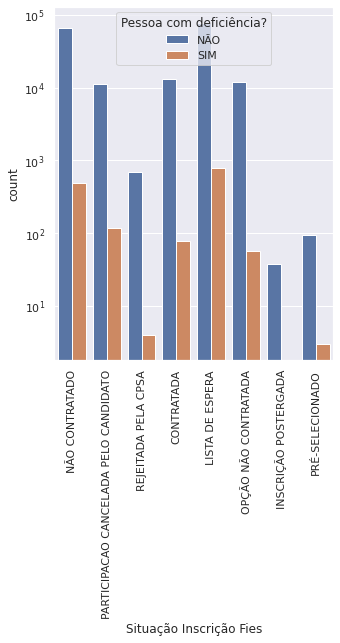

In [228]:
g = sns.countplot(x='Situação Inscrição Fies', hue = 'Pessoa com deficiência?', data=fies2020)
g.set_yscale("log")
g.tick_params(axis='x', rotation=90)

#### Situação Inscrição FIES x Sexo?

Observe que a escala logarítmica foi usada para poder visualizar melhor os dados. Conforme é possível observar, aparentemente neste ano, tem-se mais mulheres inscritas no FIES do que homens, o que também influencia nos dados

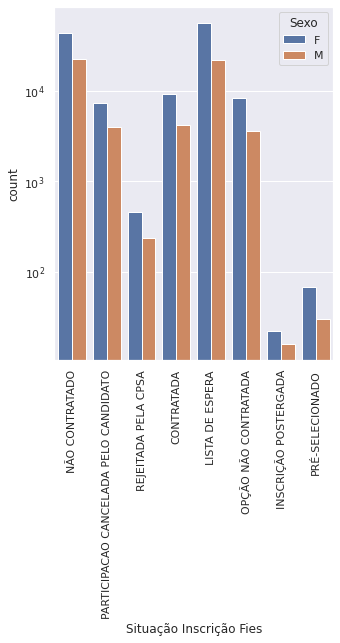

In [229]:
g = sns.countplot(x='Situação Inscrição Fies', hue = 'Sexo', data=fies2020)
g.set_yscale("log")
g.tick_params(axis='x', rotation=90)

#### Situação Inscrição Fies x Concluiu Curso Superior?

Observe que a escala logarítmica foi usada para poder visualizar melhor os dados. Assim como no caso das pessoas com deficiência, as pessoas que concluiram curso superior também representam uma parcela muito menor dos participantes do FIES

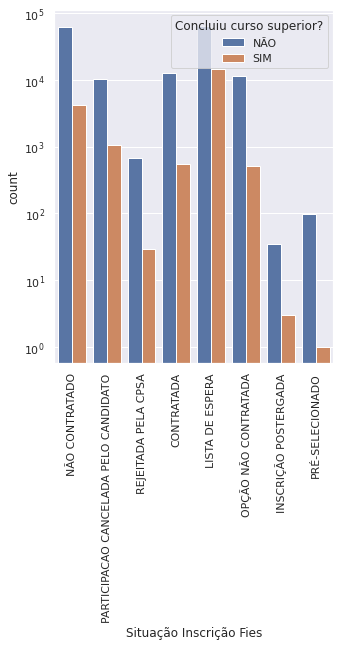

In [230]:
g = sns.countplot(x='Situação Inscrição Fies', hue = 'Concluiu curso superior?', data=fies2020)
g.set_yscale("log")
g.tick_params(axis='x', rotation=90)

#### Situação Inscrição Fies x Nº de membros família

Observe que a escala logarítmica foi usada para poder visualizar melhor os dados. Neste caso, o que apresenta ter uma relação maior é no caso de ser aceito e os membros da familia estarem no intervalo Q2_Q3.

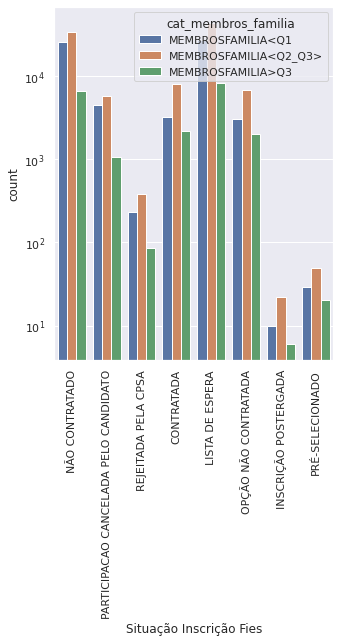

In [231]:
g = sns.countplot(x='Situação Inscrição Fies', hue = 'cat_membros_familia', data=fies2020)
g.set_yscale("log")
g.tick_params(axis='x', rotation=90)

#### Situação Inscrição Fies x Renda Per capita

Uma outra correlação clara é entre a renda per capita entre o Q2 e o Q3 e nao ser contratado

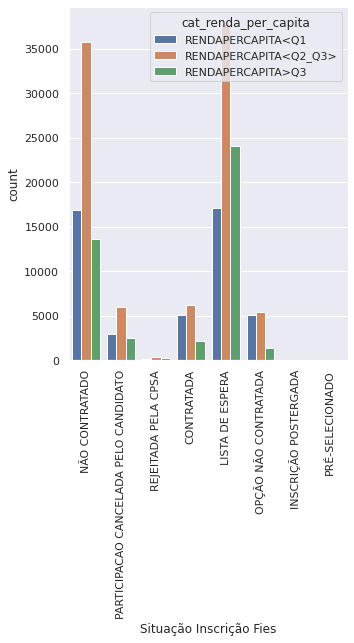

In [232]:

g = sns.countplot(x='Situação Inscrição Fies', hue = 'cat_renda_per_capita', data=fies2020)
g.tick_params(axis='x', rotation=90)

#### Situação Inscrição Fies x Opção de Inscrição

Observe que a escala logarítmica foi usada para poder visualizar melhor os dados. Por meio de tal gráfico pode-se observar, também que há mais pessoas se inscreveram para a primeira opção, o que já era esperado de acordo com as regras de negócio do FIES

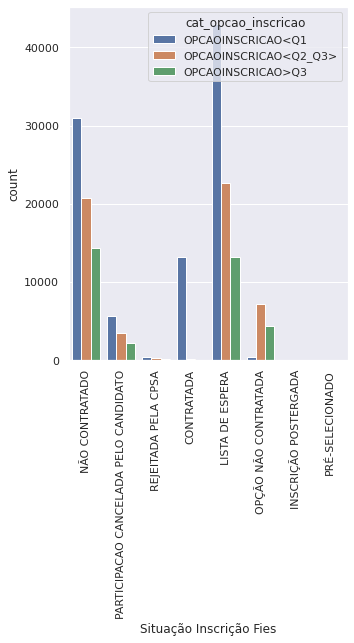

In [233]:
g = sns.countplot(x='Situação Inscrição Fies', hue = 'cat_opcao_inscricao', data=fies2020)
g.tick_params(axis='x', rotation=90)

#### Situação Inscrição Fies x Etnia/Cor

Observe que a escala logarítmica foi usada para poder visualizar melhor os dados. Por meio de tal gráfico pode-se observar, também que há mais pessoas pardas que não foram contratadas

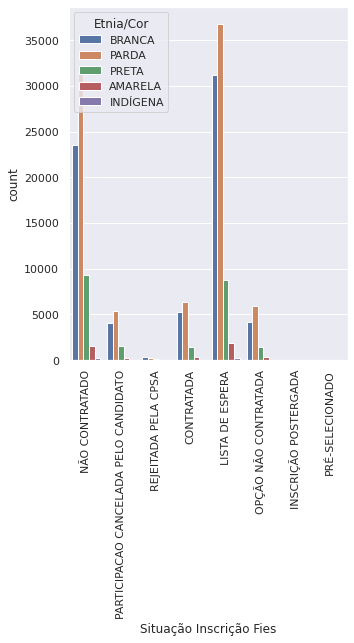

In [234]:
g = sns.countplot(x='Situação Inscrição Fies', hue = 'Etnia/Cor', data=fies2020)
g.tick_params(axis='x', rotation=90)